In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import requests
import re
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Datasets

### Airbnb Listings Data

In [3]:
x1 = '/content/drive/My Drive/DSCI599/project-599/listings_withzip.csv'

In [4]:
cols = ["id", "host_id", "host_since", "host_location", "host_response_time", "host_response_rate", "host_acceptance_rate", "host_is_superhost", "host_has_profile_pic", "minimum_nights",
        "maximum_nights", "host_identity_verified", "property_type", "room_type", "accommodates", "amenities", "beds", "price", "availability_30", "number_of_reviews", "review_scores_rating",
        "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value",
        "instant_bookable", "latitude", "longitude", "zipcode"]

listings = pd.read_csv(x1, usecols=cols)
listings = listings[cols]

In [5]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45591 entries, 0 to 45590
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           45591 non-null  int64  
 1   host_id                      45591 non-null  int64  
 2   host_since                   45575 non-null  object 
 3   host_location                34351 non-null  object 
 4   host_response_time           34863 non-null  object 
 5   host_response_rate           34863 non-null  object 
 6   host_acceptance_rate         35953 non-null  object 
 7   host_is_superhost            45342 non-null  object 
 8   host_has_profile_pic         45575 non-null  object 
 9   minimum_nights               45591 non-null  int64  
 10  maximum_nights               45591 non-null  int64  
 11  host_identity_verified       45575 non-null  object 
 12  property_type                45591 non-null  object 
 13  room_type       

In [6]:
listings.head()

,id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,latitude,longitude,zipcode
0,109,521,2008-06-27,"San Francisco, CA",NaN,NaN,50%,f,t,30,...,5.00,5.00,3.00,4.00,5.00,4.00,f,33.98301,-118.38607,90230.0
1,2708,3008,2008-09-16,"Los Angeles, CA",NaN,NaN,100%,t,t,30,...,4.80,4.93,5.00,4.98,4.95,4.88,t,34.09625,-118.34605,90038.0
2,2732,3041,2008-09-17,"Santa Monica, CA",within an hour,100%,42%,f,t,7,...,4.26,4.58,4.39,4.48,4.91,4.22,f,34.00440,-118.48095,90401.0
3,2864,3207,2008-09-25,"Bellflower, CA",NaN,NaN,NaN,f,t,30,...,NaN,NaN,NaN,NaN,NaN,NaN,f,33.87490,-118.11515,90706.0
4,63416,309512,2010-12-04,"Los Angeles, CA",within an hour,100%,96%,t,t,2,...,4.92,4.92,4.97,4.97,4.97,4.90,f,34.11344,-118.32399,90028.0


### Review/Bookings Data

In [7]:
x2 = '/content/drive/My Drive/DSCI599/project-599/reviews.csv'

In [8]:
reviews = pd.read_csv(x2)

In [9]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528123 entries, 0 to 1528122
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1528123 non-null  int64 
 1   date        1528123 non-null  object
dtypes: int64(1), object(1)
memory usage: 23.3+ MB


In [10]:
reviews.head()

,listing_id,date
0,109,2011-08-15
1,109,2016-05-15
2,2708,2014-06-09
3,2708,2014-06-23
4,2708,2015-07-25


### Attractions Data

In [11]:
x3 = '/content/drive/My Drive/DSCI599/project-599/attractions.csv'
att = pd.read_csv(x3)

In [12]:
att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44513 entries, 0 to 44512
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   latitude                44513 non-null  float64
 1   longitude               44513 non-null  float64
 2   num_nearby_attractions  44513 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 1.0 MB


In [13]:
att.head()

,latitude,longitude,num_nearby_attractions
0,34.661410,-118.233730,0
1,34.072453,-118.264551,9
2,34.077840,-118.350270,5
3,34.051730,-118.394640,1
4,34.050127,-118.458775,1


### Crime Data

In [14]:
x4 = '/content/drive/My Drive/DSCI599/project-599/crime_withzip.csv'

In [15]:
cols = ["Crm Cd Desc", "zipcode"]

crime = pd.read_csv(x4, usecols=cols)
crime = crime[cols]

In [16]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925720 entries, 0 to 925719
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Crm Cd Desc  925720 non-null  object
 1   zipcode      925720 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 14.1+ MB


In [17]:
crime.head()

,Crm Cd Desc,zipcode
0,VEHICLE - STOLEN,90019
1,BURGLARY FROM VEHICLE,90079
2,BIKE - STOLEN,90018
3,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),91401
4,THEFT OF IDENTITY,90038


# Data Preprocessing

### Airbnb Listings Data

In [18]:
# Drop any rows with missing values in the 'price' column
listings = listings.dropna(subset=['price'])

# Convert the 'price' column to float
listings['price'] = listings['price'].str.replace('$', '').str.replace(',', '').astype(float)

# Convert the 'host_since' column to datetime
listings['host_since'] = pd.to_datetime(listings['host_since'])

# Convert the 'amenities' column to a list of amenities
listings['amenities'] = listings['amenities'].apply(eval)

# Convert the 'host_response_rate', 'host_acceptance_rate' columns to float
listings['host_response_rate'] = listings['host_response_rate'].str.replace('%', '').astype(float) / 100
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].str.replace('%', '').astype(float) / 100

# Convert columns to boolean
listings['host_is_superhost'] = listings['host_is_superhost'].map({'t': True, 'f': False})
listings['host_has_profile_pic'] = listings['host_has_profile_pic'].map({'t': True, 'f': False})
listings['host_identity_verified'] = listings['host_identity_verified'].map({'t': True, 'f': False})
listings['instant_bookable'] = listings['instant_bookable'].map({'t': True, 'f': False})

# Replace non-numeric values with NaN
listings['zipcode'] = listings['zipcode'].replace([r'[^0-9]+'], np.nan, regex=True)

# Replace infinite values with NaN
listings['zipcode'] = listings['zipcode'].replace([np.inf, -np.inf], np.nan)

# Replace NaN with 0
listings['zipcode'] = listings['zipcode'].fillna(0)

# Convert to float first to remove decimals, then to int
listings['zipcode'] = listings['zipcode'].astype(float).astype(int)

# Drop any rows with missing values in the 'review_scores_rating' column
listings = listings.dropna(subset=['review_scores_rating'])

In [19]:
# Check for null values in each column
null_counts = listings.isnull().sum()
null_counts

id                                0
host_id                           0
host_since                       11
host_location                  6639
host_response_time             6171
host_response_rate             6171
host_acceptance_rate           4980
host_is_superhost               202
host_has_profile_pic             11
minimum_nights                    0
maximum_nights                    0
host_identity_verified           11
property_type                     0
room_type                         0
accommodates                      0
amenities                         0
beds                            285
price                             0
availability_30                   0
number_of_reviews                 0
review_scores_rating              0
review_scores_accuracy           12
review_scores_cleanliness        13
review_scores_checkin            20
review_scores_communication      13
review_scores_location           22
review_scores_value              26
instant_bookable            

In [20]:
# Drop rows with missing values in critical columns
critical_cols = ['id', 'host_id', 'property_type', 'room_type', 'accommodates', 'price', 'minimum_nights', 'maximum_nights']
listings = listings.dropna(subset=critical_cols)

# Fill missing values in 'host_since' column with the minimum date
listings['host_since'] = listings['host_since'].fillna(listings['host_since'].min())

# Convert host_since column to datetime type
listings['host_since'] = pd.to_datetime(listings['host_since'])

# Fill missing values in 'host_response_rate' and 'host_acceptance_rate' with 0
listings['host_response_rate'] = listings['host_response_rate'].fillna(0)
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].fillna(0)

# Fill missing values in 'host_is_superhost' with False
listings['host_is_superhost'] = listings['host_is_superhost'].fillna(False)

# Fill missing values in 'host_has_profile_pic' and 'host_identity_verified' with False
listings['host_has_profile_pic'] = listings['host_has_profile_pic'].fillna(False)
listings['host_identity_verified'] = listings['host_identity_verified'].fillna(False)

# Fill missing values in 'host_location' with 'Unknown'
listings['host_location'] = listings['host_location'].fillna('Unknown')

# Fill missing values in 'host_response_time' with the mode
mode_response_time = listings['host_response_time'].mode()[0]
listings['host_response_time'] = listings['host_response_time'].fillna(mode_response_time)

# Fill missing values in 'beds' column with median
imputer = SimpleImputer(strategy='median')
listings['beds'] = imputer.fit_transform(listings[['beds']])

listings = listings.rename(columns={'id': 'listing_id'})

# Drop rows with missing values in 'review_scores' columns
listings = listings.dropna(subset=['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                                   'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                                   'review_scores_value'])

In [21]:
# Check for null values in each column
null_counts = listings.isnull().sum()
null_counts

listing_id                     0
host_id                        0
host_since                     0
host_location                  0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_has_profile_pic           0
minimum_nights                 0
maximum_nights                 0
host_identity_verified         0
property_type                  0
room_type                      0
accommodates                   0
amenities                      0
beds                           0
price                          0
availability_30                0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bookable               0
latitude                       0
longitude                      0
zipcode   

In [22]:
# Remove outliers in the price column
# Define outliers as any value beyond 3 standard deviations from the mean
price_mean = listings['price'].mean()
price_std = listings['price'].std()
price_cutoff = price_std * 3

lower_limit = price_mean - price_cutoff
upper_limit = price_mean + price_cutoff

listings = listings[(listings['price'] >= lower_limit) & (listings['price'] <= upper_limit)]

In [23]:
listings["host_is_superhost"] = listings["host_is_superhost"].astype(int)
listings["host_has_profile_pic"] = listings["host_has_profile_pic"].astype(int)
listings["host_identity_verified"] = listings["host_identity_verified"].astype(int)
listings["instant_bookable"] = listings["instant_bookable"].astype(int)

In [24]:
host_response_time_mapping = {
    'within an hour': 1,
    'within a few hours': 12,
    'within a day': 24,
    'a few days or more' : 48
}

room_type_mapping = {
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
}

# Applying the replacement
listings['host_response_time'] = listings['host_response_time'].replace(host_response_time_mapping)
listings['room_type'] = listings['room_type'].replace(room_type_mapping)

In [25]:
listings.head()

,listing_id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,latitude,longitude,zipcode
0,109,521,2008-06-27,"San Francisco, CA",1,0.0,0.50,0,1,30,...,5.00,5.00,3.00,4.00,5.00,4.00,0,33.98301,-118.38607,90230
1,2708,3008,2008-09-16,"Los Angeles, CA",1,0.0,1.00,1,1,30,...,4.80,4.93,5.00,4.98,4.95,4.88,1,34.09625,-118.34605,90038
2,2732,3041,2008-09-17,"Santa Monica, CA",1,1.0,0.42,0,1,7,...,4.26,4.58,4.39,4.48,4.91,4.22,0,34.00440,-118.48095,90401
4,63416,309512,2010-12-04,"Los Angeles, CA",1,1.0,0.96,1,1,2,...,4.92,4.92,4.97,4.97,4.97,4.90,0,34.11344,-118.32399,90028
5,5728,9171,2009-03-05,"Los Angeles, CA",12,1.0,0.79,0,1,30,...,4.88,4.83,4.91,4.91,4.79,4.69,0,33.98750,-118.43200,90094


In [26]:
listings.dtypes

listing_id                              int64
host_id                                 int64
host_since                     datetime64[ns]
host_location                          object
host_response_time                      int64
host_response_rate                    float64
host_acceptance_rate                  float64
host_is_superhost                       int64
host_has_profile_pic                    int64
minimum_nights                          int64
maximum_nights                          int64
host_identity_verified                  int64
property_type                          object
room_type                               int64
accommodates                            int64
amenities                              object
beds                                  float64
price                                 float64
availability_30                         int64
number_of_reviews                       int64
review_scores_rating                  float64
review_scores_accuracy            

#### Merge listings and reviews dataframes


In [27]:
df = listings.merge(reviews, how = 'inner', on = 'listing_id')
df.head()

,listing_id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,minimum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,latitude,longitude,zipcode,date
0,109,521,2008-06-27,"San Francisco, CA",1,0.0,0.5,0,1,30,...,5.00,3.0,4.00,5.00,4.00,0,33.98301,-118.38607,90230,2011-08-15
1,109,521,2008-06-27,"San Francisco, CA",1,0.0,0.5,0,1,30,...,5.00,3.0,4.00,5.00,4.00,0,33.98301,-118.38607,90230,2016-05-15
2,2708,3008,2008-09-16,"Los Angeles, CA",1,0.0,1.0,1,1,30,...,4.93,5.0,4.98,4.95,4.88,1,34.09625,-118.34605,90038,2014-06-09
3,2708,3008,2008-09-16,"Los Angeles, CA",1,0.0,1.0,1,1,30,...,4.93,5.0,4.98,4.95,4.88,1,34.09625,-118.34605,90038,2014-06-23
4,2708,3008,2008-09-16,"Los Angeles, CA",1,0.0,1.0,1,1,30,...,4.93,5.0,4.98,4.95,4.88,1,34.09625,-118.34605,90038,2015-07-25


In [28]:
# Convert 'date' column in reviews to datetime and extract month and year for further analysis
df['month'] = pd.to_datetime(df['date']).dt.month
df.drop('date', axis=1, inplace=True)

#### Merge listings + reviews and attractions dataframes

In [29]:
df = pd.merge(df, att, on=['latitude', 'longitude'], how='left')

### Crime Data

In [30]:
# Create a new DataFrame with columns 'zipcode' and 'num_crimes'
crime = crime[['zipcode']].groupby('zipcode').size().reset_index()

# Rename the columns
crime.columns = ['zipcode', 'num_crimes']

In [31]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   zipcode     147 non-null    int64
 1   num_crimes  147 non-null    int64
dtypes: int64(2)
memory usage: 2.4 KB


#### Merge listings + reviews + attractions and crime dataframes


In [32]:
df = df.merge(crime, how = 'left', on = 'zipcode')
df.head()

# Replace NaN with 0
df['num_crimes'] = df['num_crimes'].fillna(0)
dff = df

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1526025 entries, 0 to 1526024
Data columns (total 34 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   listing_id                   1526025 non-null  int64         
 1   host_id                      1526025 non-null  int64         
 2   host_since                   1526025 non-null  datetime64[ns]
 3   host_location                1526025 non-null  object        
 4   host_response_time           1526025 non-null  int64         
 5   host_response_rate           1526025 non-null  float64       
 6   host_acceptance_rate         1526025 non-null  float64       
 7   host_is_superhost            1526025 non-null  int64         
 8   host_has_profile_pic         1526025 non-null  int64         
 9   minimum_nights               1526025 non-null  int64         
 10  maximum_nights               1526025 non-null  int64         
 11  host_identi

In [34]:
# df.to_csv("/content/drive/MyDrive/DSCI599/project-599/listings+reviews+crime+attractions.csv")

In [35]:
df.drop('month', axis=1, inplace=True)
df['num_bookings'] = df['number_of_reviews']
#df.drop('number_of_reviews', axis=1, inplace=True)

In [36]:
df['amenities'] = df['amenities'].apply(lambda x: tuple(x))
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)

In [37]:
df.head()

,listing_id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,minimum_nights,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,latitude,longitude,zipcode,num_nearby_attractions,num_crimes,num_bookings
0,109,521,2008-06-27,"San Francisco, CA",1,0.0,0.50,0,1,30,...,4.00,5.00,4.00,0,33.98301,-118.38607,90230,2,1646.0,2
1,2708,3008,2008-09-16,"Los Angeles, CA",1,0.0,1.00,1,1,30,...,4.98,4.95,4.88,1,34.09625,-118.34605,90038,20,18534.0,40
2,2732,3041,2008-09-17,"Santa Monica, CA",1,1.0,0.42,0,1,7,...,4.48,4.91,4.22,0,34.00440,-118.48095,90401,16,543.0,24
3,63416,309512,2010-12-04,"Los Angeles, CA",1,1.0,0.96,1,1,2,...,4.97,4.97,4.90,0,34.11344,-118.32399,90028,3,22239.0,161
4,5728,9171,2009-03-05,"Los Angeles, CA",12,1.0,0.79,0,1,30,...,4.91,4.79,4.69,0,33.98750,-118.43200,90094,2,5551.0,316


In [38]:
df_final = df.iloc[0:5]
df_final.head()

,listing_id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,minimum_nights,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,latitude,longitude,zipcode,num_nearby_attractions,num_crimes,num_bookings
0,109,521,2008-06-27,"San Francisco, CA",1,0.0,0.50,0,1,30,...,4.00,5.00,4.00,0,33.98301,-118.38607,90230,2,1646.0,2
1,2708,3008,2008-09-16,"Los Angeles, CA",1,0.0,1.00,1,1,30,...,4.98,4.95,4.88,1,34.09625,-118.34605,90038,20,18534.0,40
2,2732,3041,2008-09-17,"Santa Monica, CA",1,1.0,0.42,0,1,7,...,4.48,4.91,4.22,0,34.00440,-118.48095,90401,16,543.0,24
3,63416,309512,2010-12-04,"Los Angeles, CA",1,1.0,0.96,1,1,2,...,4.97,4.97,4.90,0,34.11344,-118.32399,90028,3,22239.0,161
4,5728,9171,2009-03-05,"Los Angeles, CA",12,1.0,0.79,0,1,30,...,4.91,4.79,4.69,0,33.98750,-118.43200,90094,2,5551.0,316


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32824 entries, 0 to 32823
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   listing_id                   32824 non-null  int64         
 1   host_id                      32824 non-null  int64         
 2   host_since                   32824 non-null  datetime64[ns]
 3   host_location                32824 non-null  object        
 4   host_response_time           32824 non-null  int64         
 5   host_response_rate           32824 non-null  float64       
 6   host_acceptance_rate         32824 non-null  float64       
 7   host_is_superhost            32824 non-null  int64         
 8   host_has_profile_pic         32824 non-null  int64         
 9   minimum_nights               32824 non-null  int64         
 10  maximum_nights               32824 non-null  int64         
 11  host_identity_verified       32824 non-nu

# Exploratory Data Analysis

In [40]:
numeric_cols = ["host_response_time", "host_response_rate", "host_acceptance_rate", "host_is_superhost", "host_has_profile_pic", "minimum_nights",
                "maximum_nights", "host_identity_verified", "accommodates", "beds", "price", "availability_30", "review_scores_rating", "review_scores_accuracy",
                "review_scores_cleanliness", "review_scores_communication", "review_scores_location", "review_scores_value", "room_type", "instant_bookable", "num_nearby_attractions",
                "num_crimes","number_of_reviews", "num_bookings"]

df_numeric = df[numeric_cols]

# Calculate correlation matrix
correlation_matrix = df_numeric.corr()

# Sorting the matrix by num_bookings in descending order
num_bookings_correlation = correlation_matrix['num_bookings'].sort_values(ascending = False)
print(num_bookings_correlation)

num_bookings                   1.000000
number_of_reviews              1.000000
host_is_superhost              0.231138
host_acceptance_rate           0.134308
host_response_rate             0.113258
review_scores_value            0.105915
review_scores_cleanliness      0.102449
review_scores_accuracy         0.100515
review_scores_communication    0.089118
review_scores_rating           0.087266
review_scores_location         0.072253
host_has_profile_pic           0.047268
host_identity_verified         0.003542
num_nearby_attractions        -0.013528
instant_bookable              -0.017470
room_type                     -0.018339
maximum_nights                -0.019550
beds                          -0.045335
accommodates                  -0.052136
num_crimes                    -0.058573
host_response_time            -0.059098
availability_30               -0.066267
price                         -0.067569
minimum_nights                -0.111895
Name: num_bookings, dtype: float64


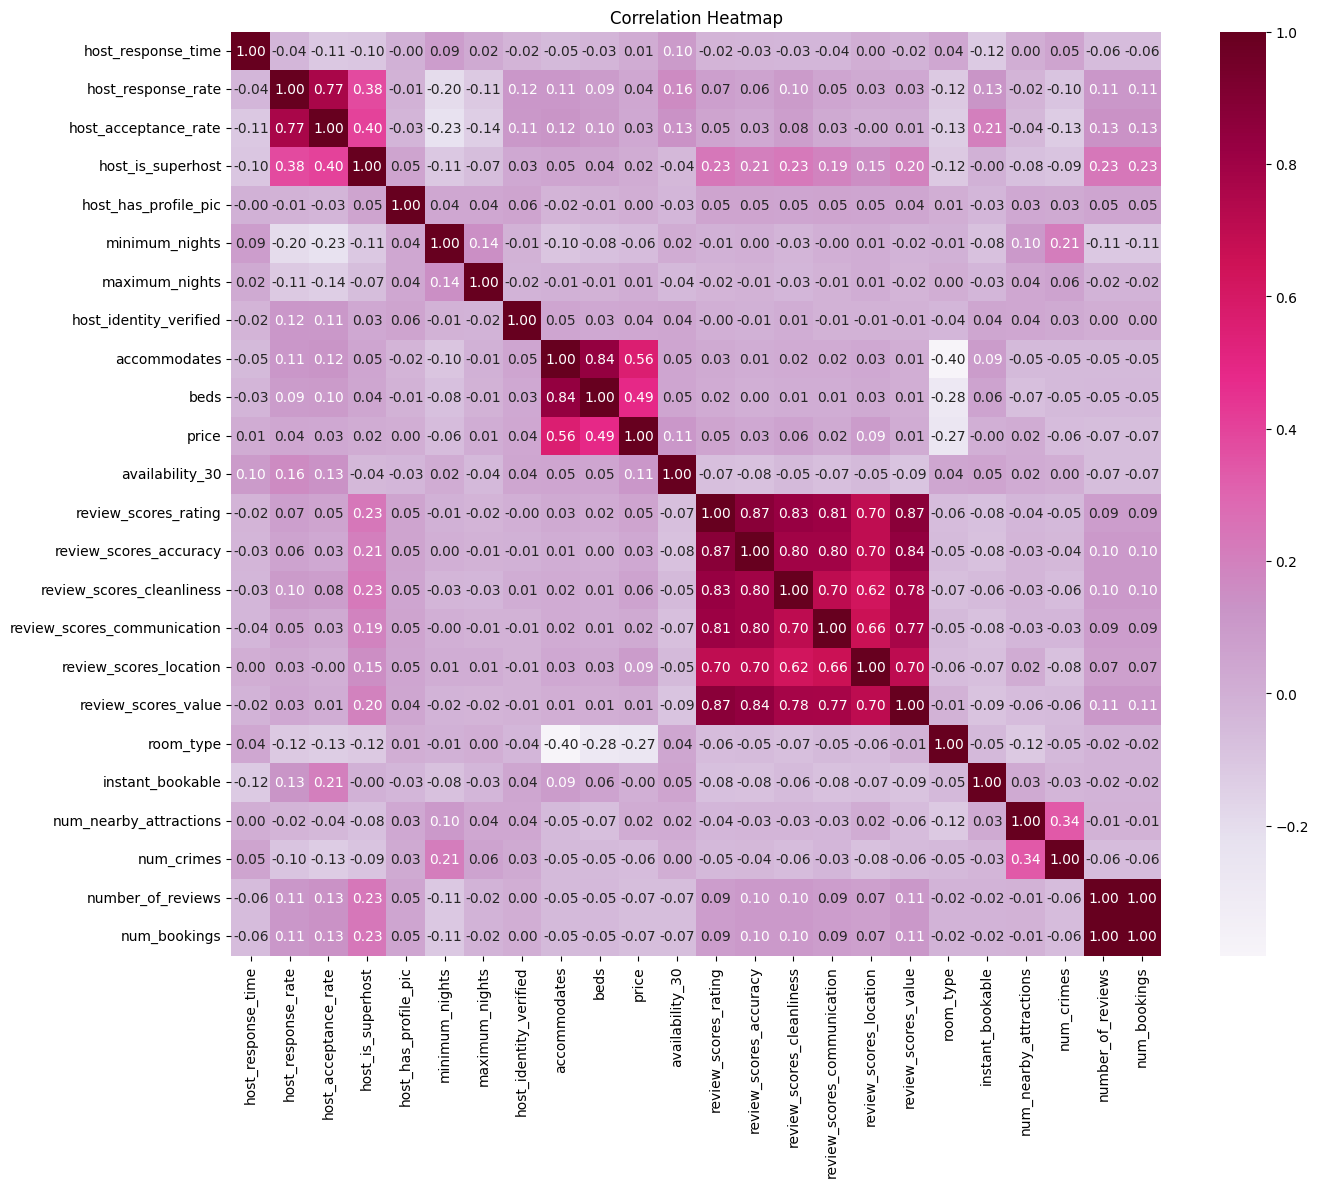

In [41]:
# Correlation heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(df_numeric.corr(), annot=True, fmt='.2f', cmap='PuRd')
plt.title('Correlation Heatmap')
plt.show()

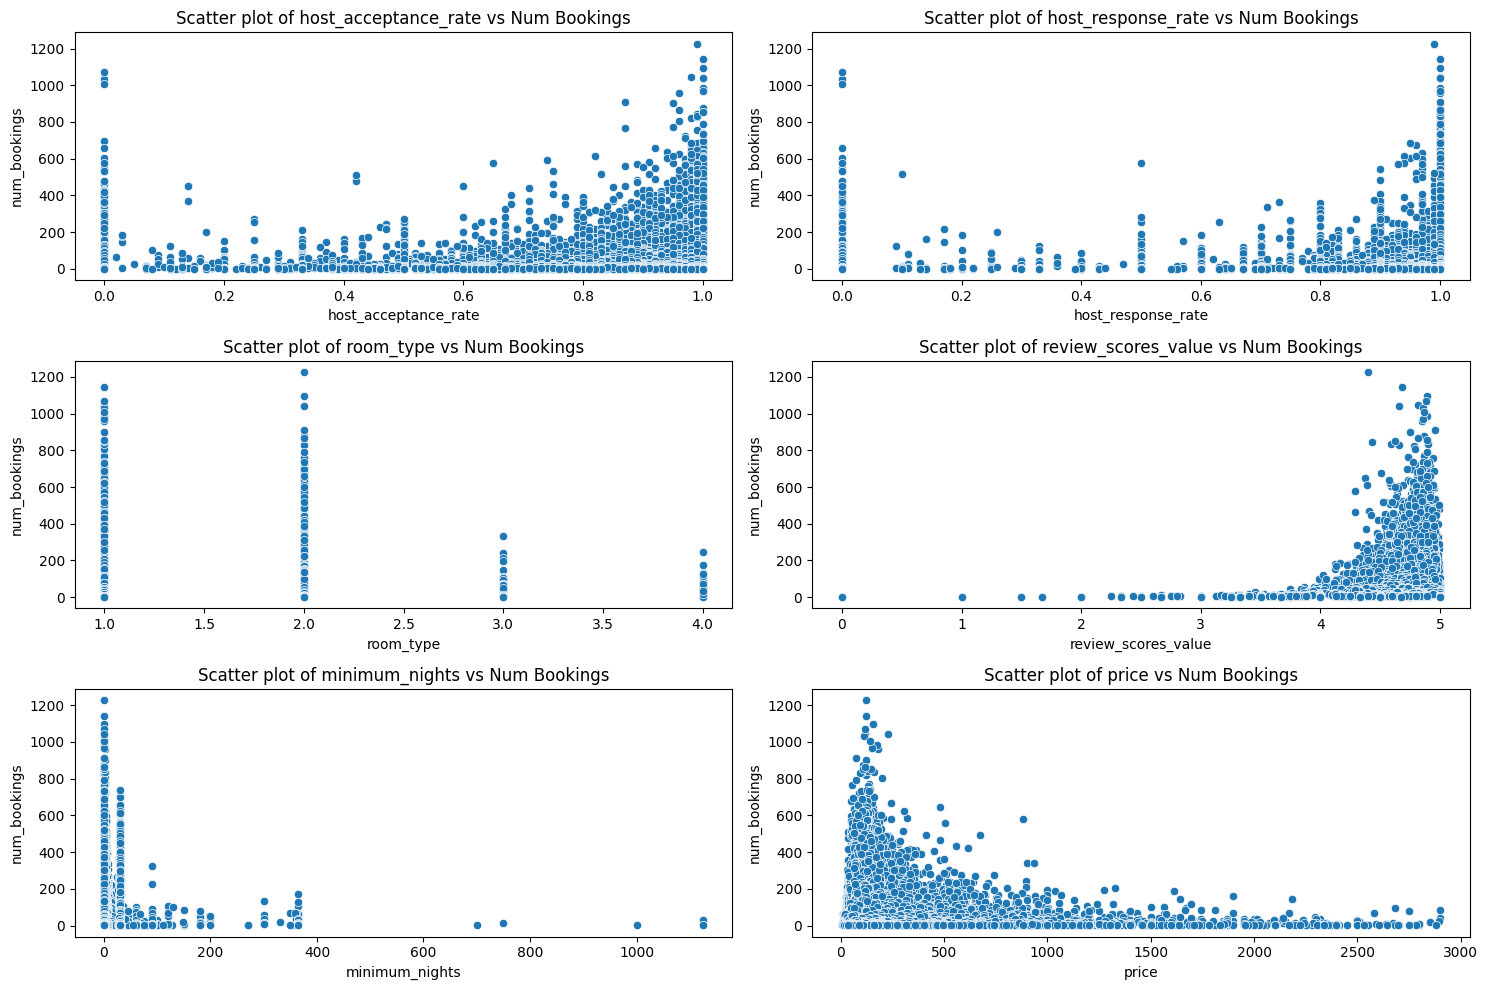

In [42]:
# Plot scatter plots for features with the highest positive and negative correlations with num_bookings
features_to_plot = ["host_acceptance_rate", "host_response_rate", "room_type",
                    "review_scores_value", "minimum_nights", "price"]

# Create a figure with subplots
plt.figure(figsize=(15, 10))

# Loop through the list of features and create scatter plots
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 2, i)  # Adjust the grid size based on the number of features
    sns.scatterplot(data=df_numeric, x=feature, y="num_bookings")
    plt.title(f"Scatter plot of {feature} vs Num Bookings")

plt.tight_layout()
plt.show()

<ipython-input-43-89acdce143a0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='room_type', data=df, palette=palette)


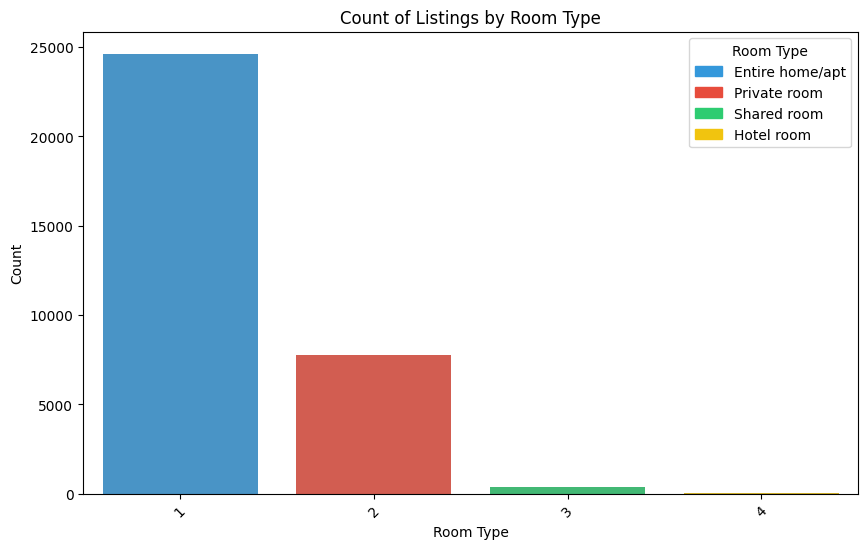

In [43]:
# Count plot for room types
plt.figure(figsize=(10, 6))
palette = ["#3498db", "#e74c3c", "#2ecc71", "#f1c40f"]
ax = sns.countplot(x='room_type', data=df, palette=palette)
plt.title('Count of Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

room_types = ['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']
patches = [mpatches.Patch(color=palette[i], label=room_types[i]) for i in range(len(room_types))]
plt.legend(handles=patches, title='Room Type')

plt.show()

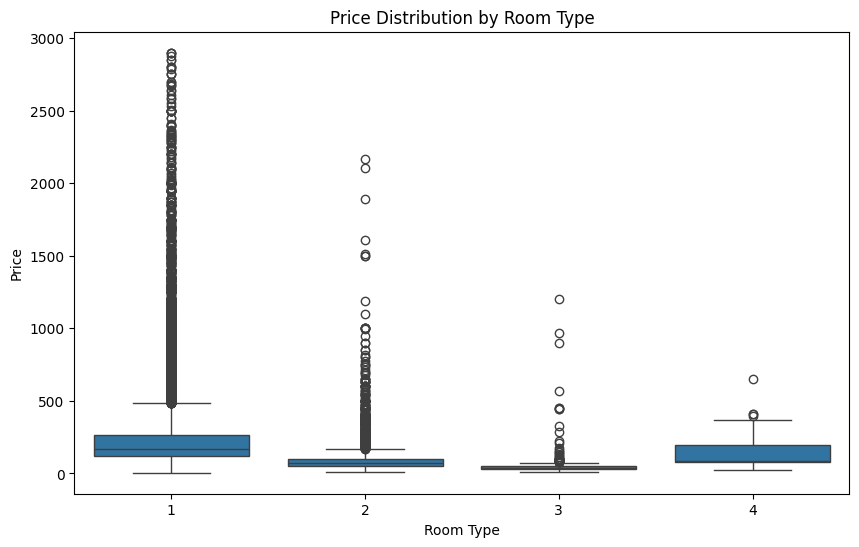

In [44]:
# Boxplot of prices by room type
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

# Clustering

In [45]:
# Making clusters of the all the listings available
grouped_df = df
grouped_df2 = df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

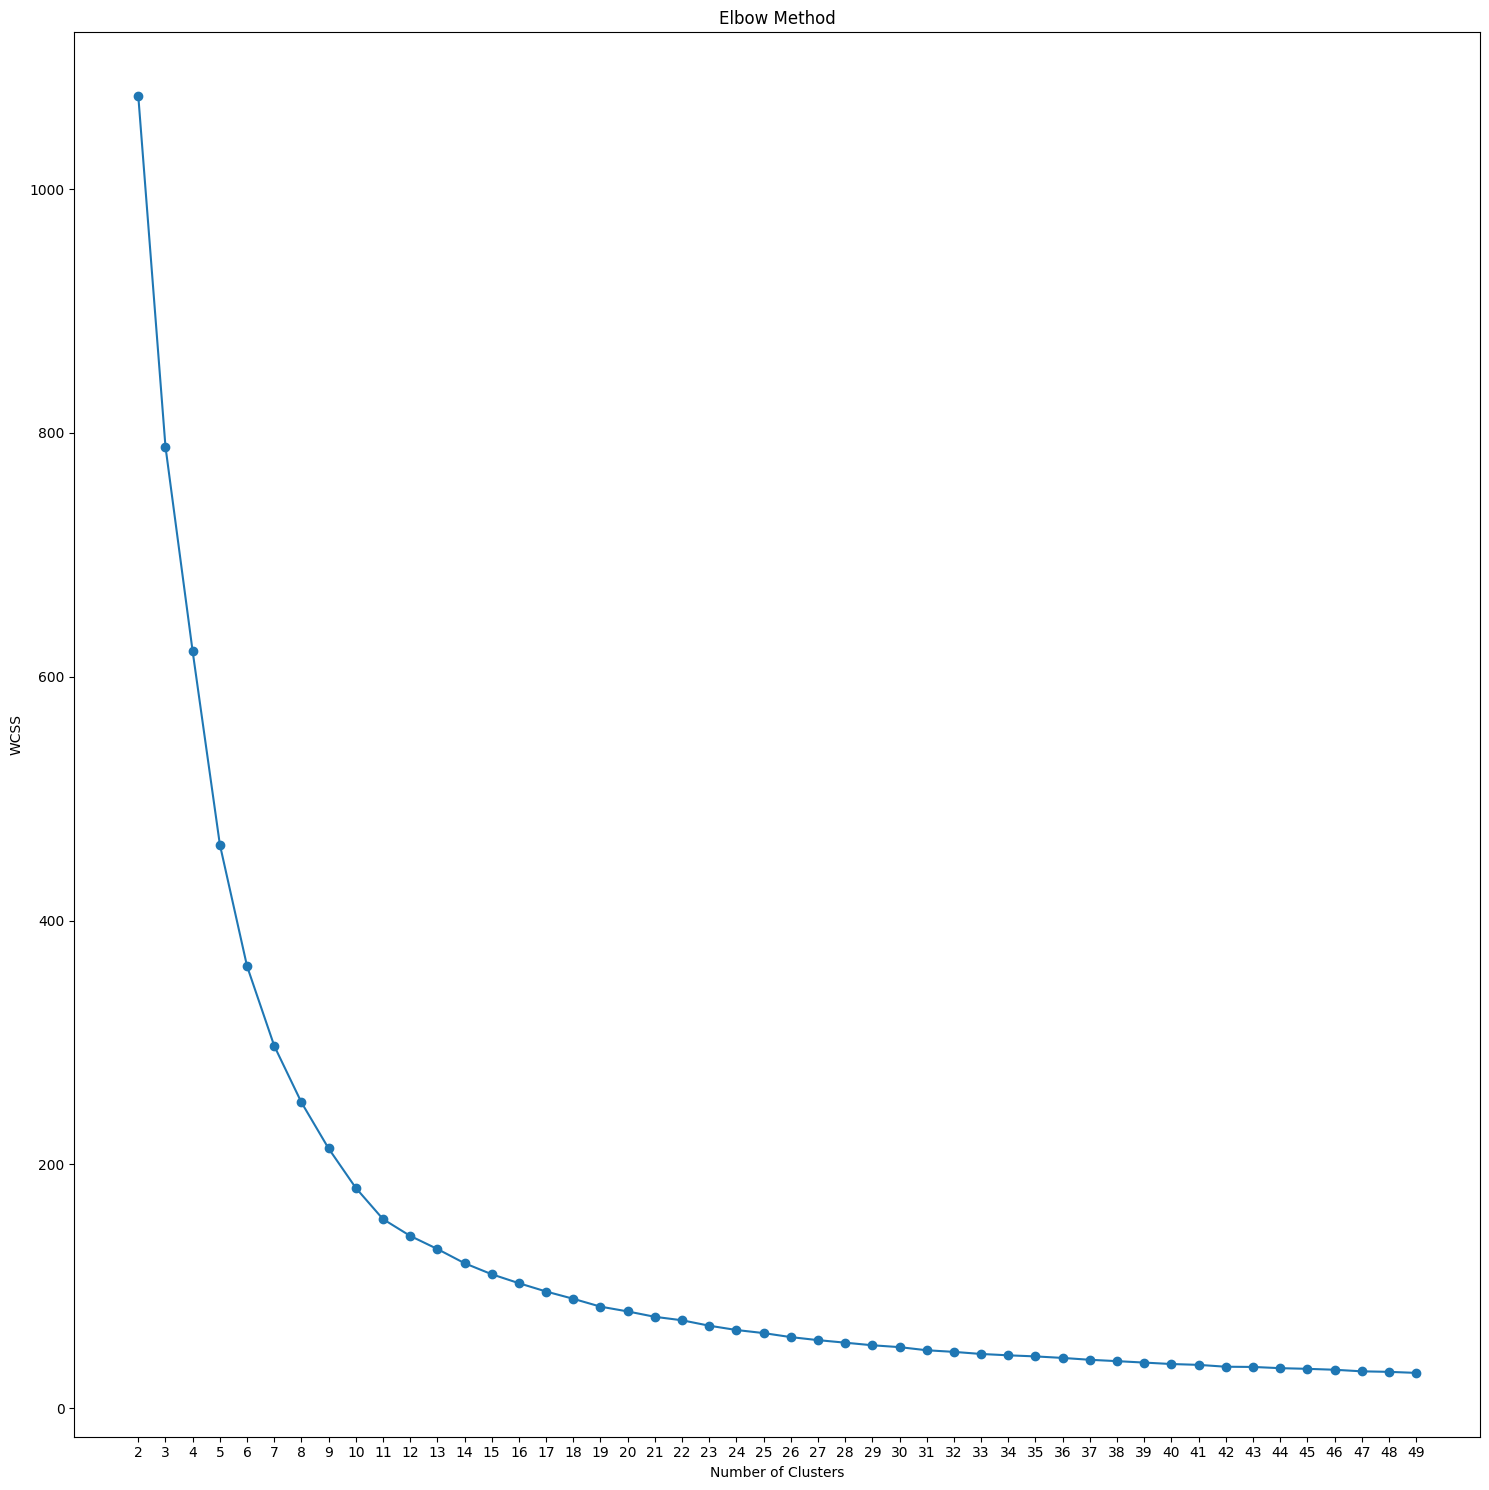

In [46]:
coords = grouped_df[['latitude', 'longitude']]

# Initialize lists to store WCSS and silhouette scores
wcss = []

# Define range of clusters to try
k_values = range(2, 50)

# Calculate WCSS and silhouette scores for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(coords)
    wcss.append(kmeans.inertia_)  # Within-Cluster Sum of Squares

# Determine the optimal k using the Elbow method
optimal_k_elbow = None
elbow_value = float('inf')
for i in range(1, len(wcss)):
    diff = wcss[i-1] - wcss[i]
    if diff < elbow_value:
        elbow_value = diff
        optimal_k_elbow = k_values[i]

# Plot the elbow curve
plt.figure(figsize=(15,15))
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.xticks(k_values)

plt.tight_layout()
plt.show()

In [47]:
# Print the optimal k
print(f"Optimal k using the Elbow method: {optimal_k_elbow}")

Optimal k using the Elbow method: 43


In [48]:
# Analysis between clusters
coords = grouped_df[['latitude', 'longitude']]
kmeans = KMeans(n_clusters=43, random_state=0).fit(coords)
grouped_df['cluster_label'] = kmeans.labels_

# Now we have a 'cluster_label' for each listing indicating its geographic group.
# For zip code grouping
grouped_zip = grouped_df.groupby('zipcode')['num_bookings'].agg(['mean', 'median', 'count']).sort_values(by='mean')

# For clusters based on coordinates
grouped_coords = grouped_df.groupby('cluster_label')['num_bookings'].agg(['mean', 'median', 'count']).sort_values(by='mean')

# Display the groups
print(grouped_zip)
print(grouped_coords)

# Identify top and bottom groups
top_groups = grouped_coords[grouped_coords['mean'] > grouped_coords['mean'].quantile(0.75)]
bottom_groups = grouped_coords[grouped_coords['mean'] < grouped_coords['mean'].quantile(0.25)]

# Extract listings from top and bottom groups
top_listings = grouped_df[grouped_df['cluster_label'].isin(top_groups.index)]
bottom_listings = grouped_df[grouped_df['cluster_label'].isin(bottom_groups.index)]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


               mean  median  count
zipcode                           
91321      7.500000     7.5      2
90015      7.677419     2.0     31
93591      9.000000     6.5     16
93560     11.000000     9.5      4
90703     12.400000     8.0     10
...             ...     ...    ...
90740    102.000000   102.0      1
90301    102.181818    62.0     55
91506    102.480000    41.0     50
93543    134.000000   154.0      3
93532    286.000000   286.0      1

[292 rows x 3 columns]
                    mean  median  count
cluster_label                          
32             30.151351     7.0   2405
29             30.807750     7.0   1342
37             31.659091    10.0    616
36             32.154762    11.0     84
1              32.738789    14.0    892
4              33.175573    11.0    131
6              33.887676    11.0    641
42             35.785276    13.0    326
39             36.523529    18.0    680
25             38.666667    13.0    345
0              38.764325     9.0   1082
2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


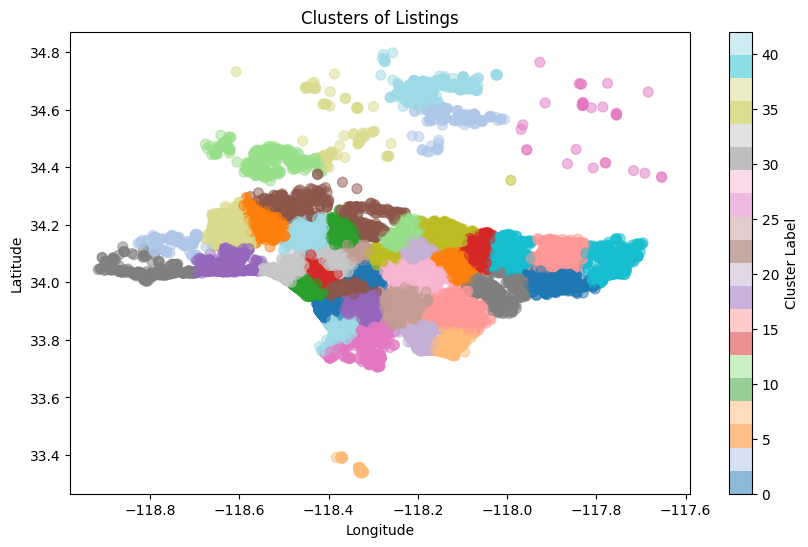

In [49]:
# Assuming coords is your DataFrame with 'latitude' and 'longitude' columns
coords = grouped_df[['latitude', 'longitude']]

# Perform K-Means clustering
kmeans = KMeans(n_clusters=43, random_state=0).fit(coords)

# Assign cluster labels to the original DataFrame
grouped_df['cluster_label'] = kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(grouped_df['longitude'], grouped_df['latitude'], c=grouped_df['cluster_label'], cmap='tab20', marker='o', s=50, alpha=0.5)
plt.title('Clusters of Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster Label')
plt.show()

# Main Analysis

In [50]:
grouped_df3= df

In [51]:
grouped_df3.head()

,listing_id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,minimum_nights,...,review_scores_location,review_scores_value,instant_bookable,latitude,longitude,zipcode,num_nearby_attractions,num_crimes,num_bookings,cluster_label
0,109,521,2008-06-27,"San Francisco, CA",1,0.0,0.50,0,1,30,...,5.00,4.00,0,33.98301,-118.38607,90230,2,1646.0,2,23
1,2708,3008,2008-09-16,"Los Angeles, CA",1,0.0,1.00,1,1,30,...,4.95,4.88,1,34.09625,-118.34605,90038,20,18534.0,40,24
2,2732,3041,2008-09-17,"Santa Monica, CA",1,1.0,0.42,0,1,7,...,4.91,4.22,0,34.00440,-118.48095,90401,16,543.0,24,33
3,63416,309512,2010-12-04,"Los Angeles, CA",1,1.0,0.96,1,1,2,...,4.97,4.90,0,34.11344,-118.32399,90028,3,22239.0,161,24
4,5728,9171,2009-03-05,"Los Angeles, CA",12,1.0,0.79,0,1,30,...,4.79,4.69,0,33.98750,-118.43200,90094,2,5551.0,316,9


Defining mean high and low performing listings for every cluster

In [52]:
# Segment listings by 'cluster_label'
zip_groups = grouped_df3.groupby('cluster_label')

# Placeholder for analysis results
analysis_results = []

labelled_dataframe = pd.DataFrame()
high_performers_labelled_final = pd.DataFrame()
low_performers_labelled_final = pd.DataFrame()

for name, group in zip_groups:
    # Calculate the median number of bookings in this group
    median_bookings = group['num_bookings'].median()

    # Separate the group into low and high performers
    low_performers = group[group['num_bookings'] <= median_bookings]
    high_performers = group[group['num_bookings'] > median_bookings]

    # Method 1: Using assign() method

    low_performers_labelled = low_performers.copy()
    high_performers_labelled = high_performers.copy()

    low_performers_labelled_final = pd.concat([low_performers_labelled_final,low_performers_labelled.assign(is_profitable=0)])
    high_performers_labelled_final =pd.concat([high_performers_labelled_final,high_performers_labelled.assign(is_profitable=1)])

    # Find the mode of the binary and categorical features
    low_mode = low_performers[['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'room_type']].mode().iloc[0].astype(int)
    high_mode = high_performers[['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'room_type']].mode().iloc[0].astype(int)

    # Compare average values of other features
    low_mean = low_performers[['host_acceptance_rate', 'host_response_rate', 'review_scores_value', 'review_scores_cleanliness', 'review_scores_accuracy',
                               'review_scores_communication', 'review_scores_rating', 'review_scores_location','review_scores_checkin', 'num_nearby_attractions',
                               'maximum_nights', 'beds', 'accommodates', 'num_crimes', 'host_response_time', 'availability_30', 'price', 'minimum_nights', 'number_of_reviews','num_bookings']].mean()
    high_mean = high_performers[['host_acceptance_rate', 'host_response_rate', 'review_scores_value', 'review_scores_cleanliness', 'review_scores_accuracy',
                                 'review_scores_communication', 'review_scores_rating', 'review_scores_location', 'review_scores_checkin','num_nearby_attractions',
                                 'maximum_nights', 'beds', 'accommodates', 'num_crimes', 'host_response_time', 'availability_30', 'price', 'minimum_nights', 'number_of_reviews','num_bookings']].mean()

    # Combine mode and mean results into one Series
    low_performance_metrics = pd.concat([low_mean, low_mode])
    high_performance_metrics = pd.concat([high_mean, high_mode])


    # Store results
    analysis_results.append({
        'cluster_label': name,
        'low_performer': low_performance_metrics,
        'high_performer': high_performance_metrics
    })

labelled_dataframe = pd.concat([labelled_dataframe,low_performers_labelled_final, high_performers_labelled_final])
# Convert results to DataFrame for easier handling and visualization
results_df = pd.DataFrame(analysis_results)

In [53]:
pd.set_option('display.max_colwidth', None)
results_df.head(2)

,cluster_label,low_performer,high_performer
0,0,host_acceptance_rate 0.627518 host_response_rate 0.671721 review_scores_value 4.484656 review_scores_cleanliness 4.527047 review_scores_accuracy 4.622029 review_scores_communication 4.712663 review_scores_rating 4.566105 review_scores_location 4.547210 review_scores_checkin 4.775435 num_nearby_attractions 2.802536 maximum_nights 552.134058 beds 1.856884 accommodates 3.079710 num_crimes 14302.626812 host_response_time 4.590580 availability_30 12.163043 price 112.128623 minimum_nights 31.903986 number_of_reviews 3.101449 num_bookings 3.101449 host_is_superhost 0.000000 host_has_profile_pic 1.000000 host_identity_verified 1.000000 instant_bookable 0.000000 room_type 1.000000 dtype: float64,host_acceptance_rate 0.718792 host_response_rate 0.748811 review_scores_value 4.729170 review_scores_cleanliness 4.755755 review_scores_accuracy 4.829566 review_scores_communication 4.885264 review_scores_rating 4.787472 review_scores_location 4.679660 review_scores_checkin 4.887472 num_nearby_attractions 2.537736 maximum_nights 530.769811 beds 2.260377 accommodates 3.894340 num_crimes 13749.762264 host_response_time 4.211321 availability_30 13.188679 price 142.624528 minimum_nights 21.794340 number_of_reviews 75.907547 num_bookings 75.907547 host_is_superhost 0.000000 host_has_profile_pic 1.000000 host_identity_verified 1.000000 instant_bookable 0.000000 room_type 1.000000 dtype: float64
1,1,host_acceptance_rate 0.694124 host_response_rate 0.701486 review_scores_value 4.616075 review_scores_cleanliness 4.589956 review_scores_accuracy 4.678093 review_scores_communication 4.757894 review_scores_rating 4.660089 review_scores_location 4.744701 review_scores_checkin 4.792971 num_nearby_attractions 0.847007 maximum_nights 480.975610 beds 2.035477 accommodates 3.665188 num_crimes 0.000000 host_response_time 2.416851 availability_30 12.243902 price 113.560976 minimum_nights 10.201774 number_of_reviews 5.177384 num_bookings 5.177384 host_is_superhost 0.000000 host_has_profile_pic 1.000000 host_identity_verified 1.000000 instant_bookable 0.000000 room_type 2.000000 dtype: float64,host_acceptance_rate 0.863605 host_response_rate 0.859569 review_scores_value 4.737211 review_scores_cleanliness 4.674558 review_scores_accuracy 4.779456 review_scores_communication 4.839637 review_scores_rating 4.738844 review_scores_location 4.805170 review_scores_checkin 4.877392 num_nearby_attractions 0.820862 maximum_nights 491.226757 beds 2.691610 accommodates 4.716553 num_crimes 0.000000 host_response_time 1.746032 availability_30 10.918367 price 129.446712 minimum_nights 7.258503 number_of_reviews 60.925170 num_bookings 60.925170 host_is_superhost 0.000000 host_has_profile_pic 1.000000 host_identity_verified 1.000000 instant_bookable 0.000000 room_type 1.000000 dtype: float64


Extracting the columns from pandasSeries to dataframe

In [54]:
results_df.sort_values(by=['cluster_label'], ascending=True)

temp_low = pd.DataFrame()

for i in range(len(results_df["low_performer"])):
  x = results_df["low_performer"][i]
  x.head()
  new_df = pd.DataFrame()
  # Add each value from the series as a new column to the DataFrame
  new_df["cluster_label"] = [i]
  for index, value in x.items():
      new_df[index+"_low"] = [value]  # Note the use of a list to ensure it is treated as a column

  temp_low = pd.concat([temp_low, new_df], axis=0)

# Now new_df has all the data from results_df2 as columns
temp_low.head()

temp_high = pd.DataFrame()

for i in range(len(results_df["high_performer"])):
  x = results_df["high_performer"][i]
  x.head()
  new_df = pd.DataFrame()
  new_df["cluster_label"] = [i]
  # Add each value from the series as a new column to the DataFrame
  for index, value in x.items():
      new_df[index+"_high"] = [value]  # Note the use of a list to ensure it is treated as a column

  temp_high = pd.concat([temp_high, new_df], axis=0)

# Now new_df has all the data from results_df2 as columns
temp_merged = pd.merge(temp_low, temp_high, on='cluster_label', how='inner')
temp_merged.head(10)

,cluster_label,host_acceptance_rate_low,host_response_rate_low,review_scores_value_low,review_scores_cleanliness_low,review_scores_accuracy_low,review_scores_communication_low,review_scores_rating_low,review_scores_location_low,review_scores_checkin_low,...,availability_30_high,price_high,minimum_nights_high,number_of_reviews_high,num_bookings_high,host_is_superhost_high,host_has_profile_pic_high,host_identity_verified_high,instant_bookable_high,room_type_high
0,0,0.627518,0.671721,4.484656,4.527047,4.622029,4.712663,4.566105,4.547210,4.775435,...,13.188679,142.624528,21.794340,75.907547,75.907547,0.0,1.0,1.0,0.0,1.0
1,1,0.694124,0.701486,4.616075,4.589956,4.678093,4.757894,4.660089,4.744701,4.792971,...,10.918367,129.446712,7.258503,60.925170,60.925170,0.0,1.0,1.0,0.0,1.0
2,2,0.700045,0.740135,4.783857,4.817668,4.890314,4.944709,4.872601,4.936099,4.930448,...,12.470588,235.312217,12.828054,97.099548,97.099548,1.0,1.0,1.0,0.0,1.0
3,3,0.646545,0.632545,4.696909,4.715091,4.777273,4.855636,4.753091,4.843273,4.847818,...,10.054545,264.181818,4.854545,79.872727,79.872727,1.0,1.0,1.0,0.0,1.0
4,4,0.706364,0.764697,4.547727,4.566061,4.557879,4.629848,4.554091,4.612879,4.620758,...,13.846154,124.738462,3.076923,62.169231,62.169231,1.0,1.0,1.0,0.0,2.0
5,5,0.832932,0.830451,4.649586,4.692669,4.726278,4.817180,4.700113,4.767425,4.797406,...,11.251440,124.003839,2.635317,96.132438,96.132438,1.0,1.0,1.0,0.0,1.0
6,6,0.743731,0.758440,4.724098,4.774648,4.817248,4.875566,4.802661,4.813853,4.860703,...,14.343949,205.624204,17.140127,65.248408,65.248408,1.0,1.0,1.0,0.0,1.0
7,7,0.766422,0.773976,4.727798,4.766911,4.838257,4.878899,4.832661,4.833731,4.894220,...,12.578125,207.021875,9.490625,113.481250,113.481250,1.0,1.0,1.0,0.0,1.0
8,8,0.948559,0.931532,4.254144,4.439730,4.529279,4.518649,4.495045,4.867568,4.673964,...,17.509091,367.554545,1.736364,86.400000,86.400000,0.0,1.0,1.0,1.0,1.0
9,9,0.674742,0.720276,4.655116,4.720348,4.776586,4.844697,4.775321,4.860000,4.827861,...,12.974153,251.934938,18.608734,113.243316,113.243316,1.0,1.0,1.0,0.0,1.0


In [55]:
# Create an empty DataFrame to store the mean values
cluster_means = pd.DataFrame()

# Iterate over each cluster label
for cluster_label in results_df['cluster_label'].unique():
    # Extract low and high performer data for the current cluster
    low_performer_data = results_df.loc[results_df['cluster_label'] == cluster_label, 'low_performer'].iloc[0]
    high_performer_data = results_df.loc[results_df['cluster_label'] == cluster_label, 'high_performer'].iloc[0]

    # Create a DataFrame to hold the mean values for the current cluster
    cluster_mean = pd.DataFrame({'cluster_label': [cluster_label]})

    # Calculate the mean for each feature and add it to the DataFrame
    for feature in low_performer_data.index:
        mean_value = (low_performer_data[feature] + high_performer_data[feature]) / 2
        cluster_mean[feature] = [mean_value]

    # Append the mean values for the current cluster to the main DataFrame
    cluster_means = pd.concat([cluster_means, cluster_mean], axis=0)

# Reset index of the final DataFrame
cluster_means.reset_index(drop=True, inplace=True)

# Display the mean values for each cluster
cluster_means.head()

,cluster_label,host_acceptance_rate,host_response_rate,review_scores_value,review_scores_cleanliness,review_scores_accuracy,review_scores_communication,review_scores_rating,review_scores_location,review_scores_checkin,...,availability_30,price,minimum_nights,number_of_reviews,num_bookings,host_is_superhost,host_has_profile_pic,host_identity_verified,instant_bookable,room_type
0,0,0.673155,0.710266,4.606913,4.641401,4.725798,4.798964,4.676788,4.613435,4.831453,...,12.675861,127.376576,26.849163,39.504498,39.504498,0.0,1.0,1.0,0.0,1.0
1,1,0.778865,0.780527,4.676643,4.632257,4.728774,4.798765,4.699466,4.774935,4.835182,...,11.581135,121.503844,8.730139,33.051277,33.051277,0.0,1.0,1.0,0.0,1.5
2,2,0.777330,0.809932,4.769281,4.832431,4.875134,4.921834,4.858563,4.915877,4.921831,...,12.423635,297.308575,15.257076,51.206724,51.206724,0.5,1.0,1.0,0.0,1.0
3,3,0.734545,0.737545,4.772727,4.801364,4.845182,4.898273,4.827182,4.890273,4.897000,...,11.881818,247.863636,10.254545,42.145455,42.145455,0.5,1.0,1.0,0.0,1.0
4,4,0.760874,0.806195,4.706248,4.720646,4.743324,4.790078,4.731353,4.741824,4.787379,...,16.165501,122.694988,4.833916,33.395221,33.395221,0.5,1.0,1.0,0.0,1.5


Taking mean so we can generalize for all clusters

In [56]:
mean_result = temp_merged.mean()
mean_result.head(100)

cluster_label                         21.000000
host_acceptance_rate_low               0.733312
host_response_rate_low                 0.753851
review_scores_value_low                4.634237
review_scores_cleanliness_low          4.681384
review_scores_accuracy_low             4.731105
review_scores_communication_low        4.794523
review_scores_rating_low               4.712958
review_scores_location_low             4.750093
review_scores_checkin_low              4.801447
num_nearby_attractions_low             2.991850
maximum_nights_low                   487.123611
beds_low                               2.393979
accommodates_low                       4.158757
num_crimes_low                      3306.789626
host_response_time_low                 4.346763
availability_30_low                   13.846140
price_low                            226.577621
minimum_nights_low                    15.002701
number_of_reviews_low                  5.804753
num_bookings_low                       5

In [57]:
mean_result_df = mean_result.to_frame().transpose().head()

Comparing average low performing listing with average high performing listing

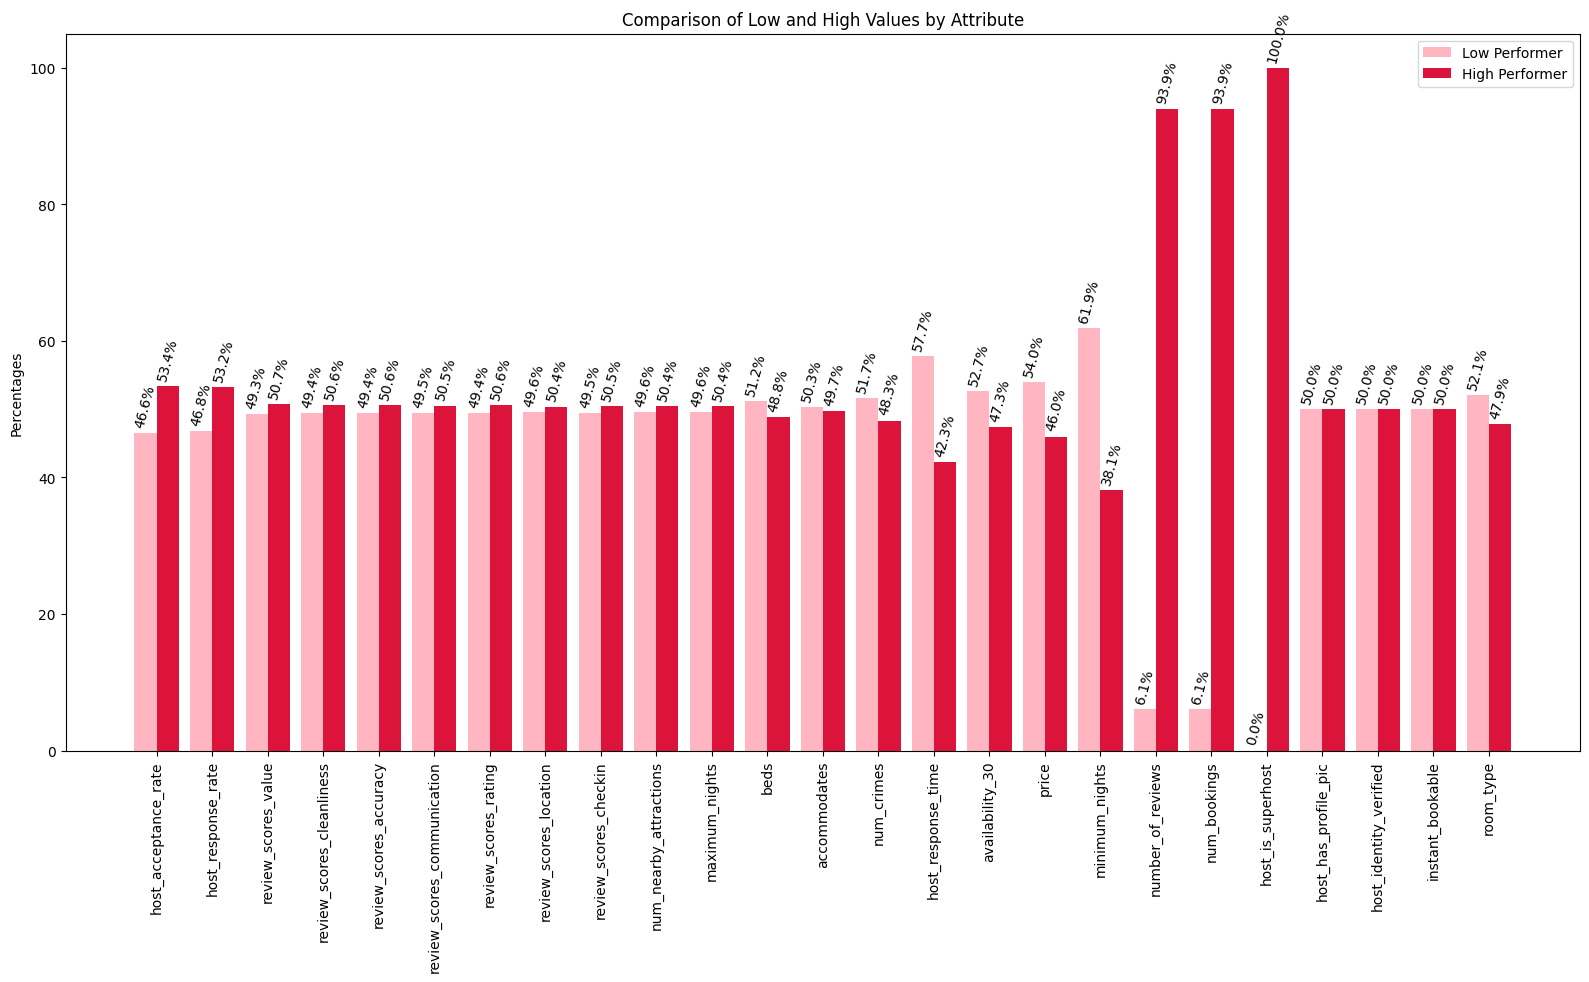

In [58]:
mean_result_df.drop(['cluster_label'], axis=1)

# Prepare data for plotting
attributes = []  # List to store attribute names
low_values = []  # List to store low values as percentages
high_values = [] # List to store high values as percentages

# Extract attributes and calculate percentages
for column in mean_result_df.columns:
    if '_low' in column:
        attribute_name = column.replace('_low', '')
        low_value = mean_result_df[column][0]  # Assuming there is only one row of data
        high_value = mean_result_df[f'{attribute_name}_high'][0]
        total = low_value + high_value
        low_percentage = (low_value / total) * 100
        high_percentage = (high_value / total) * 100
        attributes.append(attribute_name)
        low_values.append(low_percentage)
        high_values.append(high_percentage)

# Set up the bar graph with an increased figure size
fig, ax = plt.subplots(figsize=(16, 8))
width = 0.40  # the width of the bars

x = range(len(attributes))  # the label locations
rects1 = ax.bar(x, low_values, width, label='Low Performer', color='lightpink')
rects2 = ax.bar([p + width for p in x], high_values, width, label='High Performer', color='crimson')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentages')
ax.set_title('Comparison of Low and High Values by Attribute')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(attributes)
ax.legend()

# Function to attach a label above each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=75)

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

# Show the plot
plt.xticks(rotation=90)
plt.show()

# Suggestions

Selecting a random record from original dataset and predicting the cluster for it based on longitude and latitude

In [59]:
# Assume `random_record` is a random record from `df`
random_record = df.sample()

# Extract latitude and longitude values from the random record
latitude = random_record['latitude'].values[0]
longitude = random_record['longitude'].values[0]

# Predict the cluster label for the latitude and longitude values
predicted_cluster_label = kmeans.predict([[latitude, longitude]])

print("Predicted Cluster Label:", predicted_cluster_label[0])

predicted_cluster_label_random_record = predicted_cluster_label[0]

Predicted Cluster Label: 24


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [60]:
temp_merged.head(100)

,cluster_label,host_acceptance_rate_low,host_response_rate_low,review_scores_value_low,review_scores_cleanliness_low,review_scores_accuracy_low,review_scores_communication_low,review_scores_rating_low,review_scores_location_low,review_scores_checkin_low,...,availability_30_high,price_high,minimum_nights_high,number_of_reviews_high,num_bookings_high,host_is_superhost_high,host_has_profile_pic_high,host_identity_verified_high,instant_bookable_high,room_type_high
0,0,0.627518,0.671721,4.484656,4.527047,4.622029,4.712663,4.566105,4.547210,4.775435,...,13.188679,142.624528,21.794340,75.907547,75.907547,0.0,1.0,1.0,0.0,1.0
1,1,0.694124,0.701486,4.616075,4.589956,4.678093,4.757894,4.660089,4.744701,4.792971,...,10.918367,129.446712,7.258503,60.925170,60.925170,0.0,1.0,1.0,0.0,1.0
2,2,0.700045,0.740135,4.783857,4.817668,4.890314,4.944709,4.872601,4.936099,4.930448,...,12.470588,235.312217,12.828054,97.099548,97.099548,1.0,1.0,1.0,0.0,1.0
3,3,0.646545,0.632545,4.696909,4.715091,4.777273,4.855636,4.753091,4.843273,4.847818,...,10.054545,264.181818,4.854545,79.872727,79.872727,1.0,1.0,1.0,0.0,1.0
4,4,0.706364,0.764697,4.547727,4.566061,4.557879,4.629848,4.554091,4.612879,4.620758,...,13.846154,124.738462,3.076923,62.169231,62.169231,1.0,1.0,1.0,0.0,2.0
5,5,0.832932,0.830451,4.649586,4.692669,4.726278,4.817180,4.700113,4.767425,4.797406,...,11.251440,124.003839,2.635317,96.132438,96.132438,1.0,1.0,1.0,0.0,1.0
6,6,0.743731,0.758440,4.724098,4.774648,4.817248,4.875566,4.802661,4.813853,4.860703,...,14.343949,205.624204,17.140127,65.248408,65.248408,1.0,1.0,1.0,0.0,1.0
7,7,0.766422,0.773976,4.727798,4.766911,4.838257,4.878899,4.832661,4.833731,4.894220,...,12.578125,207.021875,9.490625,113.481250,113.481250,1.0,1.0,1.0,0.0,1.0
8,8,0.948559,0.931532,4.254144,4.439730,4.529279,4.518649,4.495045,4.867568,4.673964,...,17.509091,367.554545,1.736364,86.400000,86.400000,0.0,1.0,1.0,1.0,1.0
9,9,0.674742,0.720276,4.655116,4.720348,4.776586,4.844697,4.775321,4.860000,4.827861,...,12.974153,251.934938,18.608734,113.243316,113.243316,1.0,1.0,1.0,0.0,1.0


In [61]:
pd.set_option('display.max_columns', None)

Picking up the average high performing hotel value for the cluster of the random record we got

In [62]:
filtered_row = temp_merged[temp_merged['cluster_label'] == predicted_cluster_label_random_record]
filtered_row.head()

,cluster_label,host_acceptance_rate_low,host_response_rate_low,review_scores_value_low,review_scores_cleanliness_low,review_scores_accuracy_low,review_scores_communication_low,review_scores_rating_low,review_scores_location_low,review_scores_checkin_low,num_nearby_attractions_low,maximum_nights_low,beds_low,accommodates_low,num_crimes_low,host_response_time_low,availability_30_low,price_low,minimum_nights_low,number_of_reviews_low,num_bookings_low,host_is_superhost_low,host_has_profile_pic_low,host_identity_verified_low,instant_bookable_low,room_type_low,host_acceptance_rate_high,host_response_rate_high,review_scores_value_high,review_scores_cleanliness_high,review_scores_accuracy_high,review_scores_communication_high,review_scores_rating_high,review_scores_location_high,review_scores_checkin_high,num_nearby_attractions_high,maximum_nights_high,beds_high,accommodates_high,num_crimes_high,host_response_time_high,availability_30_high,price_high,minimum_nights_high,number_of_reviews_high,num_bookings_high,host_is_superhost_high,host_has_profile_pic_high,host_identity_verified_high,instant_bookable_high,room_type_high
24,24,0.682078,0.736769,4.554833,4.593851,4.670441,4.751858,4.647744,4.75047,4.747829,13.116726,552.329537,2.017794,3.84911,14179.766548,3.692527,13.565836,252.956584,22.648399,3.958007,3.958007,0.0,1.0,1.0,0.0,1.0,0.779087,0.815694,4.710927,4.753623,4.815881,4.884055,4.783954,4.835715,4.865478,12.180446,545.332854,2.200575,4.174694,13889.076923,3.629044,13.282531,234.82243,16.963336,74.3422,74.3422,0.0,1.0,1.0,0.0,1.0


Creating an ideal dataframe which tells us what value of the columns/parameters should be for average high performing listing

In [63]:
## selecting only required coolumns

columns_to_select = ['host_response_time_high','host_response_rate_high','host_acceptance_rate_high','host_has_profile_pic_high','minimum_nights_high','maximum_nights_high','host_identity_verified_high','price_high','review_scores_rating_high','accommodates_high','beds_high','availability_30_high','number_of_reviews_high','review_scores_accuracy_high','review_scores_cleanliness_high','review_scores_checkin_high','review_scores_communication_high','review_scores_location_high','review_scores_value_high','instant_bookable_high','num_nearby_attractions_high','num_crimes_high']
# Select the specified columns from the DataFrame
ideal_record = filtered_row[columns_to_select]

# Rename columns by removing the suffix "_high"
ideal_record.columns = ideal_record.columns.str.replace('_high', '')

# Print the selected columns
ideal_record.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_has_profile_pic,minimum_nights,maximum_nights,host_identity_verified,price,review_scores_rating,accommodates,beds,availability_30,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,num_nearby_attractions,num_crimes
24,3.629044,0.815694,0.779087,1.0,16.963336,545.332854,1.0,234.82243,4.783954,4.174694,2.200575,13.282531,74.3422,4.815881,4.753623,4.865478,4.884055,4.835715,4.710927,0.0,12.180446,13889.076923


random record dataframe which will take the value of random value we selected

In [64]:
columns_to_select = ['host_response_time','host_response_rate','host_acceptance_rate','host_has_profile_pic','minimum_nights','maximum_nights','host_identity_verified','price','review_scores_rating','accommodates','beds','availability_30','number_of_reviews','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','num_nearby_attractions','num_crimes']
# Select the specified columns from the DataFrame
random_record = random_record[columns_to_select]

# Rename columns by removing the suffix "_high"
random_record.columns = random_record.columns.str.replace('_high', '')

# Print the selected columns
random_record.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_has_profile_pic,minimum_nights,maximum_nights,host_identity_verified,price,review_scores_rating,accommodates,beds,availability_30,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,num_nearby_attractions,num_crimes
20559,12,1.0,1.0,1,30,200,1,95.0,5.0,4,2.0,9,4,5.0,5.0,5.0,5.0,5.0,5.0,1,20,6434.0


Based on the ideal record we had for average high performing listing, we will compare it with our random record to suggest what factors can be improved

In [65]:
# Initialize a dictionary to store suggestions
suggestions = {}

# Compare each column and generate suggestions
if ideal_record['host_response_time'].iloc[0] < random_record['host_response_time'].iloc[0]:
    suggestions['host_response_time'] = (random_record['host_response_time'].iloc[0], ideal_record['host_response_time'].iloc[0])

if ideal_record['host_response_rate'].iloc[0] > random_record['host_response_rate'].iloc[0]:
    suggestions['host_response_rate'] = (random_record['host_response_rate'].iloc[0], ideal_record['host_response_rate'].iloc[0])

if ideal_record['host_acceptance_rate'].iloc[0] > random_record['host_acceptance_rate'].iloc[0]:
    suggestions['host_acceptance_rate'] = (random_record['host_acceptance_rate'].iloc[0], ideal_record['host_acceptance_rate'].iloc[0])

if ideal_record['host_has_profile_pic'].iloc[0] > random_record['host_has_profile_pic'].iloc[0]:
    suggestions['host_has_profile_pic'] = (random_record['host_has_profile_pic'].iloc[0], ideal_record['host_has_profile_pic'].iloc[0])

if ideal_record['minimum_nights'].iloc[0] > random_record['minimum_nights'].iloc[0]:
    suggestions['minimum_nights'] = (random_record['minimum_nights'].iloc[0], ideal_record['minimum_nights'].iloc[0])

if ideal_record['maximum_nights'].iloc[0] > random_record['maximum_nights'].iloc[0]:
    suggestions['maximum_nights'] = (random_record['maximum_nights'].iloc[0], ideal_record['maximum_nights'].iloc[0])

if ideal_record['host_identity_verified'].iloc[0] > random_record['host_identity_verified'].iloc[0]:
    suggestions['host_identity_verified'] = (random_record['host_identity_verified'].iloc[0], ideal_record['host_identity_verified'].iloc[0])

if ideal_record['price'].iloc[0] < random_record['price'].iloc[0]:
    suggestions['price'] = (random_record['price'].iloc[0], ideal_record['price'].iloc[0])

if ideal_record['review_scores_rating'].iloc[0] > random_record['review_scores_rating'].iloc[0]:
    suggestions['review_scores_rating'] = (random_record['review_scores_rating'].iloc[0], ideal_record['review_scores_rating'].iloc[0])

if ideal_record['accommodates'].iloc[0] > random_record['accommodates'].iloc[0]:
    suggestions['accommodates'] = (random_record['accommodates'].iloc[0], ideal_record['accommodates'].iloc[0])

if ideal_record['beds'].iloc[0] > random_record['beds'].iloc[0]:
    suggestions['beds'] = (random_record['beds'].iloc[0], ideal_record['beds'].iloc[0])

if ideal_record['availability_30'].iloc[0] > random_record['availability_30'].iloc[0]:
    suggestions['availability_30'] = (random_record['availability_30'].iloc[0], ideal_record['availability_30'].iloc[0])

if ideal_record['number_of_reviews'].iloc[0] > random_record['number_of_reviews'].iloc[0]:
    suggestions['number_of_reviews'] = (random_record['number_of_reviews'].iloc[0], ideal_record['number_of_reviews'].iloc[0])

if ideal_record['review_scores_accuracy'].iloc[0] > random_record['review_scores_accuracy'].iloc[0]:
    suggestions['review_scores_accuracy'] = (random_record['review_scores_accuracy'].iloc[0], ideal_record['review_scores_accuracy'].iloc[0])

if ideal_record['review_scores_cleanliness'].iloc[0] > random_record['review_scores_cleanliness'].iloc[0]:
    suggestions['review_scores_cleanliness'] = (random_record['review_scores_cleanliness'].iloc[0], ideal_record['review_scores_cleanliness'].iloc[0])

if ideal_record['review_scores_checkin'].iloc[0] > random_record['review_scores_checkin'].iloc[0]:
    suggestions['review_scores_checkin'] = (random_record['review_scores_checkin'].iloc[0], ideal_record['review_scores_checkin'].iloc[0])

if ideal_record['review_scores_communication'].iloc[0] > random_record['review_scores_communication'].iloc[0]:
    suggestions['review_scores_communication'] = (random_record['review_scores_communication'].iloc[0], ideal_record['review_scores_communication'].iloc[0])

if ideal_record['review_scores_location'].iloc[0] > random_record['review_scores_location'].iloc[0]:
    suggestions['review_scores_location'] = (random_record['review_scores_location'].iloc[0], ideal_record['review_scores_location'].iloc[0])

if ideal_record['review_scores_value'].iloc[0] > random_record['review_scores_value'].iloc[0]:
    suggestions['review_scores_value'] = (random_record['review_scores_value'].iloc[0], ideal_record['review_scores_value'].iloc[0])

if ideal_record['instant_bookable'].iloc[0] > random_record['instant_bookable'].iloc[0]:
    suggestions['instant_bookable'] = (random_record['instant_bookable'].iloc[0], ideal_record['instant_bookable'].iloc[0])

if ideal_record['num_nearby_attractions'].iloc[0] > random_record['num_nearby_attractions'].iloc[0]:
    suggestions['num_nearby_attractions'] = (random_record['num_nearby_attractions'].iloc[0], ideal_record['num_nearby_attractions'].iloc[0])

if ideal_record['num_crimes'].iloc[0] < random_record['num_crimes'].iloc[0]:
    suggestions['num_crimes'] = (random_record['num_crimes'].iloc[0], ideal_record['num_crimes'].iloc[0])

# Print suggestions
print("Suggestions:")
for column, (random_value, suggested_value) in suggestions.items():
    print(f"  - {column}: Original Value - {random_value}, Suggested Value - {suggested_value}")


Suggestions:
  - host_response_time: Original Value - 12, Suggested Value - 3.629043853342919
  - maximum_nights: Original Value - 200, Suggested Value - 545.332854061826
  - accommodates: Original Value - 4, Suggested Value - 4.174694464414091
  - beds: Original Value - 2.0, Suggested Value - 2.2005751258087707
  - availability_30: Original Value - 9, Suggested Value - 13.28253055355859
  - number_of_reviews: Original Value - 4, Suggested Value - 74.34219985621854


Displaying actual random record value to suggested value from avg high performing listing

In [66]:
# Convert suggestions dictionary to DataFrame
suggestions_df = pd.DataFrame.from_dict(suggestions, orient='index', columns=['Actual_Value', 'Suggested_Value'])

# Print the DataFrame
suggestions_df.head(100)

,Actual_Value,Suggested_Value
host_response_time,12.0,3.629044
maximum_nights,200.0,545.332854
accommodates,4.0,4.174694
beds,2.0,2.200575
availability_30,9.0,13.282531
number_of_reviews,4.0,74.342200


Percentage change improvements required for success/profitability

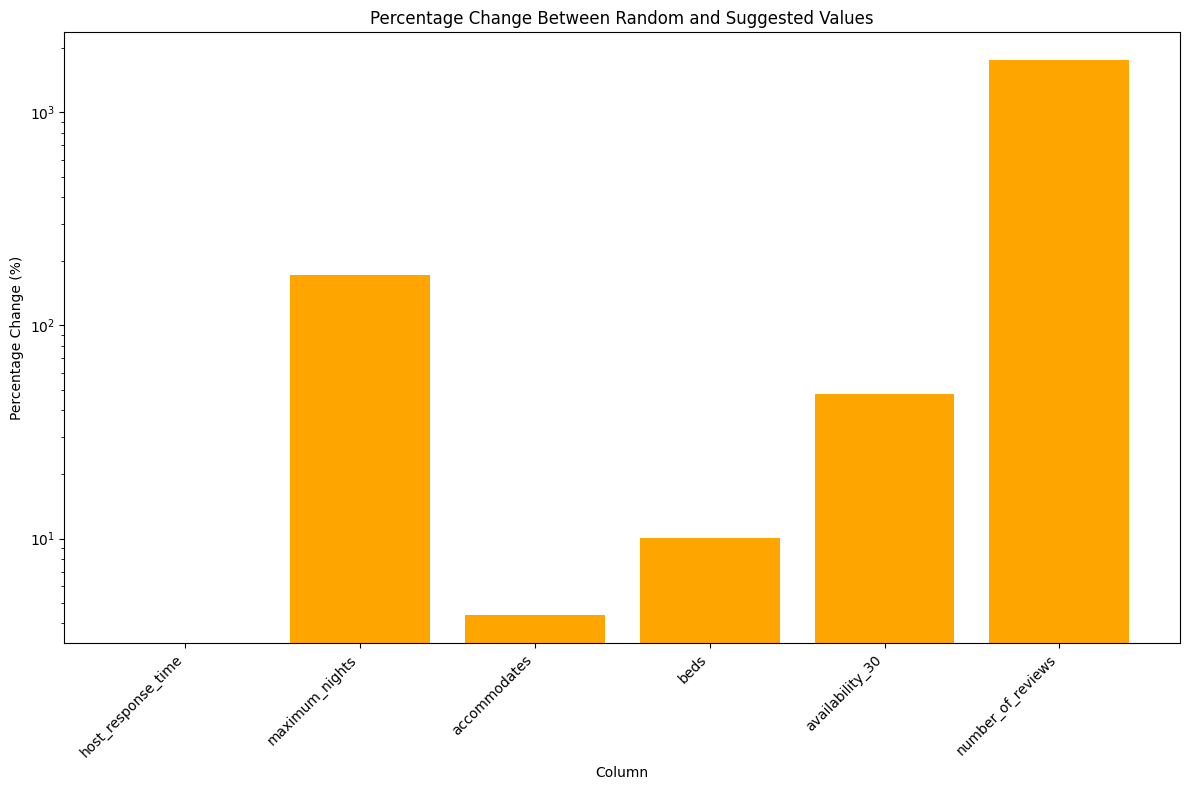

In [67]:
# Calculate percentage change
suggestions_df['Percentage_Change'] = ((suggestions_df['Suggested_Value'] - suggestions_df['Actual_Value']) / suggestions_df['Actual_Value']) * 100

# Plot the percentage change with logarithmic scale
plt.figure(figsize=(12, 8))
plt.bar(suggestions_df.index, suggestions_df['Percentage_Change'], color='orange')
plt.title('Percentage Change Between Random and Suggested Values')
plt.xlabel('Column')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.yscale('log')  # Set logarithmic scale for y-axis
plt.tight_layout()
plt.show()


In [68]:
labelled_dataframe['host_since'] = pd.to_datetime(labelled_dataframe['host_since'])
labelled_dataframe['host_since'] = labelled_dataframe['host_since'].astype(int) // 10**9

In [69]:
columns_to_drop = ['host_location', 'property_type', 'amenities']
labelled_dataframe.drop(columns=columns_to_drop, inplace=True)

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = labelled_dataframe.drop("is_profitable", axis=1)
y = labelled_dataframe["is_profitable"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": model.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)
print("Top 5 important features:")
print(feature_importance.head(5))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3333
           1       0.99      0.99      0.99      3232

    accuracy                           0.99      6565
   macro avg       0.99      0.99      0.99      6565
weighted avg       0.99      0.99      0.99      6565

Top 5 important features:
                   Feature  Importance
30            num_bookings    0.297895
16       number_of_reviews    0.279296
18  review_scores_accuracy    0.044879
23     review_scores_value    0.043510
17    review_scores_rating    0.043483


In [71]:
X.head()

,listing_id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,minimum_nights,maximum_nights,host_identity_verified,room_type,accommodates,beds,price,availability_30,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,latitude,longitude,zipcode,num_nearby_attractions,num_crimes,num_bookings,cluster_label
34,90986,491953,1302134400,1,0.0,0.0,0,1,180,365,1,1,2,1.0,105.0,30,1,4.00,5.00,3.00,5.00,5.0,3.00,4.00,0,34.039480,-118.340810,90019,0,12731.0,1,0
407,789243,2609082,1339372800,1,0.0,0.0,0,1,30,30,1,1,2,1.0,119.0,28,9,4.44,4.67,4.44,4.78,5.0,4.56,4.33,0,34.061020,-118.299260,90005,9,13216.0,9,0
698,1393501,157662,1278115200,1,0.0,0.0,0,1,30,1125,1,1,3,2.0,250.0,29,1,5.00,5.00,5.00,5.00,5.0,5.00,0.00,0,34.070049,-118.312822,90004,3,14277.0,1,0
769,1499991,4178498,1353196800,1,0.0,0.0,0,1,30,90,1,2,1,1.0,52.0,0,2,4.50,4.50,4.50,5.00,5.0,3.50,4.00,0,34.042350,-118.351620,90019,0,12731.0,2,0
890,1802843,9451607,1381795200,1,0.0,0.0,0,1,30,1125,1,1,2,1.0,55.0,0,7,3.86,4.43,3.14,5.00,5.0,4.71,4.43,0,34.063100,-118.300030,90005,7,13216.0,7,0


In [99]:
# User given input - I have taken random record instead of user input. Just take user input here.

#loss listing
sample_record_X = X[X['listing_id'] == 90986]

#profitable listing
#sample_record_X = X[X['listing_id'] == 69838]

In [93]:
# Extract latitude and longitude values from the random record
latitude = sample_record_X['latitude'].values[0]
longitude = sample_record_X['longitude'].values[0]

# Predict the cluster label for the latitude and longitude values
predicted_cluster_label = kmeans.predict([[latitude, longitude]])

print("Predicted Cluster Label:", predicted_cluster_label[0])

predicted_cluster_label_sample_record = predicted_cluster_label[0]

Predicted Cluster Label: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [94]:
ideal_num_booking_value = high_performers_labelled_final[high_performers_labelled_final['cluster_label'] == predicted_cluster_label_sample_record]

ideal_num_booking_value_min = ideal_num_booking_value['num_bookings'].min()
ideal_num_booking_value_max = ideal_num_booking_value['num_bookings'].max()

num_bookings_X = int(sample_record_X['num_bookings'].iloc[0])

if num_bookings_X < ideal_num_booking_value_min:
  sample_record_Y = 0
  # Predict profitability for the sample record
  prediction = model.predict(sample_record_X)
  if prediction == 0:
    print("The listing is predicted to be non-profitable.")
    # Get feature importances
    feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": model.feature_importances_})
    feature_importance = feature_importance.sort_values(by="Importance", ascending=False)
    print("Feature importance:")
    print(feature_importance)
    # Provide recommendations based on feature importance
    # Example recommendations based on top features:
    print("Recommendations:")
    for feature, importance in feature_importance.head(5).iterrows():
        print(f"Improve {importance['Feature']} to increase profitability.")
  else:
    print("The listing is predicted to be profitable.")

else:
  sample_record_Y = 1
  ideal_record = high_performers_labelled_final[high_performers_labelled_final['num_bookings'] == ideal_num_booking_value_max]
  # Initialize a dictionary to store suggestions
  suggestions = {}

  # Compare each column and generate suggestions
  if ideal_record['host_response_time'].iloc[0] < sample_record_X['host_response_time'].iloc[0]:
      suggestions['host_response_time'] = (sample_record_X['host_response_time'].iloc[0], ideal_record['host_response_time'].iloc[0])

  if ideal_record['host_response_rate'].iloc[0] > sample_record_X['host_response_rate'].iloc[0]:
      suggestions['host_response_rate'] = (sample_record_X['host_response_rate'].iloc[0], ideal_record['host_response_rate'].iloc[0])

  if ideal_record['host_acceptance_rate'].iloc[0] > sample_record_X['host_acceptance_rate'].iloc[0]:
      suggestions['host_acceptance_rate'] = (sample_record_X['host_acceptance_rate'].iloc[0], ideal_record['host_acceptance_rate'].iloc[0])

  if ideal_record['host_has_profile_pic'].iloc[0] > sample_record_X['host_has_profile_pic'].iloc[0]:
      suggestions['host_has_profile_pic'] = (sample_record_X['host_has_profile_pic'].iloc[0], ideal_record['host_has_profile_pic'].iloc[0])

  if ideal_record['minimum_nights'].iloc[0] > sample_record_X['minimum_nights'].iloc[0]:
      suggestions['minimum_nights'] = (sample_record_X['minimum_nights'].iloc[0], ideal_record['minimum_nights'].iloc[0])

  if ideal_record['maximum_nights'].iloc[0] > sample_record_X['maximum_nights'].iloc[0]:
      suggestions['maximum_nights'] = (sample_record_X['maximum_nights'].iloc[0], ideal_record['maximum_nights'].iloc[0])

  if ideal_record['host_identity_verified'].iloc[0] > sample_record_X['host_identity_verified'].iloc[0]:
      suggestions['host_identity_verified'] = (sample_record_X['host_identity_verified'].iloc[0], ideal_record['host_identity_verified'].iloc[0])

  if ideal_record['price'].iloc[0] < sample_record_X['price'].iloc[0]:
      suggestions['price'] = (sample_record_X['price'].iloc[0], ideal_record['price'].iloc[0])

  if ideal_record['review_scores_rating'].iloc[0] > sample_record_X['review_scores_rating'].iloc[0]:
      suggestions['review_scores_rating'] = (sample_record_X['review_scores_rating'].iloc[0], ideal_record['review_scores_rating'].iloc[0])

  if ideal_record['accommodates'].iloc[0] > sample_record_X['accommodates'].iloc[0]:
      suggestions['accommodates'] = (sample_record_X['accommodates'].iloc[0], ideal_record['accommodates'].iloc[0])

  if ideal_record['beds'].iloc[0] > sample_record_X['beds'].iloc[0]:
      suggestions['beds'] = (sample_record_X['beds'].iloc[0], ideal_record['beds'].iloc[0])

  if ideal_record['availability_30'].iloc[0] > sample_record_X['availability_30'].iloc[0]:
      suggestions['availability_30'] = (sample_record_X['availability_30'].iloc[0], ideal_record['availability_30'].iloc[0])

  if ideal_record['number_of_reviews'].iloc[0] > sample_record_X['number_of_reviews'].iloc[0]:
      suggestions['number_of_reviews'] = (sample_record_X['number_of_reviews'].iloc[0], ideal_record['number_of_reviews'].iloc[0])

  if ideal_record['review_scores_accuracy'].iloc[0] > sample_record_X['review_scores_accuracy'].iloc[0]:
      suggestions['review_scores_accuracy'] = (sample_record_X['review_scores_accuracy'].iloc[0], ideal_record['review_scores_accuracy'].iloc[0])

  if ideal_record['review_scores_cleanliness'].iloc[0] > sample_record_X['review_scores_cleanliness'].iloc[0]:
      suggestions['review_scores_cleanliness'] = (sample_record_X['review_scores_cleanliness'].iloc[0], ideal_record['review_scores_cleanliness'].iloc[0])

  if ideal_record['review_scores_checkin'].iloc[0] > sample_record_X['review_scores_checkin'].iloc[0]:
      suggestions['review_scores_checkin'] = (sample_record_X['review_scores_checkin'].iloc[0], ideal_record['review_scores_checkin'].iloc[0])

  if ideal_record['review_scores_communication'].iloc[0] > sample_record_X['review_scores_communication'].iloc[0]:
      suggestions['review_scores_communication'] = (sample_record_X['review_scores_communication'].iloc[0], ideal_record['review_scores_communication'].iloc[0])

  if ideal_record['review_scores_location'].iloc[0] > sample_record_X['review_scores_location'].iloc[0]:
      suggestions['review_scores_location'] = (sample_record_X['review_scores_location'].iloc[0], ideal_record['review_scores_location'].iloc[0])

  if ideal_record['review_scores_value'].iloc[0] > sample_record_X['review_scores_value'].iloc[0]:
      suggestions['review_scores_value'] = (sample_record_X['review_scores_value'].iloc[0], ideal_record['review_scores_value'].iloc[0])

  if ideal_record['instant_bookable'].iloc[0] > sample_record_X['instant_bookable'].iloc[0]:
      suggestions['instant_bookable'] = (sample_record_X['instant_bookable'].iloc[0], ideal_record['instant_bookable'].iloc[0])

  if ideal_record['num_nearby_attractions'].iloc[0] > sample_record_X['num_nearby_attractions'].iloc[0]:
      suggestions['num_nearby_attractions'] = (sample_record_X['num_nearby_attractions'].iloc[0], ideal_record['num_nearby_attractions'].iloc[0])

  if ideal_record['num_crimes'].iloc[0] < sample_record_X['num_crimes'].iloc[0]:
      suggestions['num_crimes'] = (sample_record_X['num_crimes'].iloc[0], ideal_record['num_crimes'].iloc[0])

  # Print suggestions
  print("Suggestions:")
  for column, (random_value, suggested_value) in suggestions.items():
      print(f"  - {column}: Original Value - {random_value}, Suggested Value - {suggested_value}")

Suggestions:
  - host_response_time: Original Value - 12, Suggested Value - 1
  - host_acceptance_rate: Original Value - 0.97, Suggested Value - 1.0
  - review_scores_rating: Original Value - 4.8, Suggested Value - 4.92
  - number_of_reviews: Original Value - 726, Suggested Value - 735
  - review_scores_accuracy: Original Value - 4.81, Suggested Value - 4.98
  - review_scores_cleanliness: Original Value - 4.66, Suggested Value - 4.94
  - review_scores_checkin: Original Value - 4.93, Suggested Value - 4.99
  - review_scores_communication: Original Value - 4.89, Suggested Value - 4.93
  - review_scores_location: Original Value - 4.77, Suggested Value - 4.95
  - review_scores_value: Original Value - 4.79, Suggested Value - 4.86
  - instant_bookable: Original Value - 0, Suggested Value - 1
  - num_nearby_attractions: Original Value - 1, Suggested Value - 2
  - num_crimes: Original Value - 12731.0, Suggested Value - 4956.0


In [100]:
## New User

# Assuming df is your DataFrame
columns_to_keep = [
    'host_is_superhost',
    'host_has_profile_pic',
    'host_identity_verified',
    'num_nearby_attractions',
    'instant_bookable',
    'room_type',
    'beds',
    'accommodates',
    'num_crimes',
    'availability_30',
    'price',
    'latitude',
    'longitude'
]

temp5 = sample_record_X.copy()

# Filter the DataFrame to include only the specified columns
selected_df = temp5.loc[:, columns_to_keep]

# For the rest of the columns, set the values to null
for column in temp5.columns:
    if column not in columns_to_keep:
        selected_df[column] = None

selected_df.head()

prediction = model.predict(sample_record_X)
if prediction == 0:
  print("The listing is predicted to be non-profitable.")
  # Get feature importances
  feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": model.feature_importances_})
  feature_importance = feature_importance.sort_values(by="Importance", ascending=False)
  print("Feature importance:")
  print(feature_importance)
  # Provide recommendations based on feature importance
  # Example recommendations based on top features:
  print("Recommendations:")
  for feature, importance in feature_importance.head(5).iterrows():
      print(f"Improve {importance['Feature']} to increase profitability.")
else:
  print("The listing is predicted to be profitable.")

The listing is predicted to be non-profitable.
Feature importance:
                        Feature  Importance
30                 num_bookings    0.297895
16            number_of_reviews    0.279296
18       review_scores_accuracy    0.044879
23          review_scores_value    0.043510
17         review_scores_rating    0.043483
22       review_scores_location    0.039309
19    review_scores_cleanliness    0.035198
21  review_scores_communication    0.033599
20        review_scores_checkin    0.027749
26                    longitude    0.020924
31                cluster_label    0.019287
0                    listing_id    0.018157
25                     latitude    0.016487
29                   num_crimes    0.016045
27                      zipcode    0.015408
14                        price    0.005780
1                       host_id    0.005276
2                    host_since    0.005205
28       num_nearby_attractions    0.004200
5          host_acceptance_rate    0.004179
8        